In [1]:
import pandas as pd
import numpy as np

In [2]:
retail_df = pd.read_csv('Retail_dataset.csv')

In [3]:
retail_df.head(5)

,Customer_id,Age,Gender,City,Country,Product_id,Product_category,Transaction_id,Transaction_date,Unit_price,Discount_percent,Quantity,Rating
0,2731,70,Male,Mumbai,India,1053,Outdoors,0ef5cc994d45e4642a954768875c8411b844,1/22/2022,$131.00,21,7,1
1,1416,87,Female,Sao Paulo,Brazil,1070,Garden,7aafd647205f918385943906a0528699d6b9,10/27/2022,$33.00,28,6,1
2,1578,52,Female,Sao Paulo,Brazil,1086,Industrial,a8d924c647682ab36e8343a7cf3ececfe646,10/29/2021,$150.00,26,3,3
3,118,18,Male,Johannesburg,South Africa,1171,Grocery,06a6d2696f366e0725805217e65a19f4ecf6,12/3/2020,$142.00,27,1,3
4,2188,90,Female,Paris,France,1185,Baby,b204e06bcf8a69aa8bf668cf8fb0c64b9428,6/22/2021,$42.00,6,7,5


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer_id       10000 non-null  int64 
 1   Age               10000 non-null  int64 
 2   Gender            10000 non-null  object
 3   City              10000 non-null  object
 4   Country           10000 non-null  object
 5   Product_id        10000 non-null  int64 
 6   Product_category  10000 non-null  object
 7   Transaction_id    10000 non-null  object
 8   Transaction_date  10000 non-null  object
 9   Unit_price        10000 non-null  object
 10  Discount_percent  10000 non-null  int64 
 11  Quantity          10000 non-null  int64 
 12  Rating            10000 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1015.8+ KB


In [5]:
retail_df.describe()

,Customer_id,Age,Product_id,Discount_percent,Quantity,Rating
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1548.118800,53.69350,1101.218700,14.878400,3.976100,2.990600
std,835.316929,21.55442,58.022729,8.966775,1.995126,1.416726
min,101.000000,17.00000,1001.000000,0.000000,1.000000,1.000000
25%,822.000000,34.00000,1050.750000,7.000000,2.000000,2.000000
50%,1551.000000,54.00000,1102.000000,15.000000,4.000000,3.000000
75%,2271.000000,72.00000,1152.000000,23.000000,6.000000,4.000000
max,3000.000000,90.00000,1200.000000,30.000000,7.000000,5.000000


Data Wrangling

In [6]:
# Remove the dollar sign and convert to numeric
retail_df['Unit_price'] = retail_df['Unit_price'].str.replace('$', '', regex=False).str.replace(',', '')
retail_df['Unit_price'] = pd.to_numeric(retail_df['Unit_price'], errors='coerce')

In [7]:
#Convert to Datetime
retail_df['Transaction_date'] = pd.to_datetime(retail_df['Transaction_date'],errors='coerce')

In [8]:
#Convert Discount to percentages
retail_df['Discount_percent'] = retail_df['Discount_percent']/100

In [9]:
retail_df.isna().sum()

Customer_id         0
Age                 0
Gender              0
City                0
Country             0
Product_id          0
Product_category    0
Transaction_id      0
Transaction_date    0
Unit_price          0
Discount_percent    0
Quantity            0
Rating              0
dtype: int64

In [10]:
retail_df.isnull().sum()

Customer_id         0
Age                 0
Gender              0
City                0
Country             0
Product_id          0
Product_category    0
Transaction_id      0
Transaction_date    0
Unit_price          0
Discount_percent    0
Quantity            0
Rating              0
dtype: int64

In [11]:
retail_df.duplicated().sum()

0

In [12]:
retail_df.describe()

,Customer_id,Age,Product_id,Transaction_date,Unit_price,Discount_percent,Quantity,Rating
count,10000.000000,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1548.118800,53.69350,1101.218700,2022-01-04 11:57:33.119999744,98.512400,0.148784,3.976100,2.990600
min,101.000000,17.00000,1001.000000,2020-01-01 00:00:00,10.000000,0.000000,1.000000,1.000000
25%,822.000000,34.00000,1050.750000,2021-01-04 00:00:00,52.000000,0.070000,2.000000,2.000000
50%,1551.000000,54.00000,1102.000000,2022-01-10 00:00:00,98.000000,0.150000,4.000000,3.000000
75%,2271.000000,72.00000,1152.000000,2023-01-09 00:00:00,138.000000,0.230000,6.000000,4.000000
max,3000.000000,90.00000,1200.000000,2023-12-31 00:00:00,199.000000,0.300000,7.000000,5.000000
std,835.316929,21.55442,58.022729,NaN,52.732708,0.089668,1.995126,1.416726


In [13]:
#Feature Extraction
retail_df['Year'] = retail_df['Transaction_date'].dt.year
retail_df['Month'] = retail_df['Transaction_date'].dt.month
retail_df['Quarter'] = retail_df['Transaction_date'].dt.quarter
retail_df['Weekday'] = retail_df['Transaction_date'].dt.dayofweek
retail_df['Total_amount'] = retail_df['Unit_price'] * retail_df['Quantity']

In [14]:
retail_df['Discount_impact'] = retail_df['Discount_percent']*retail_df['Total_amount']

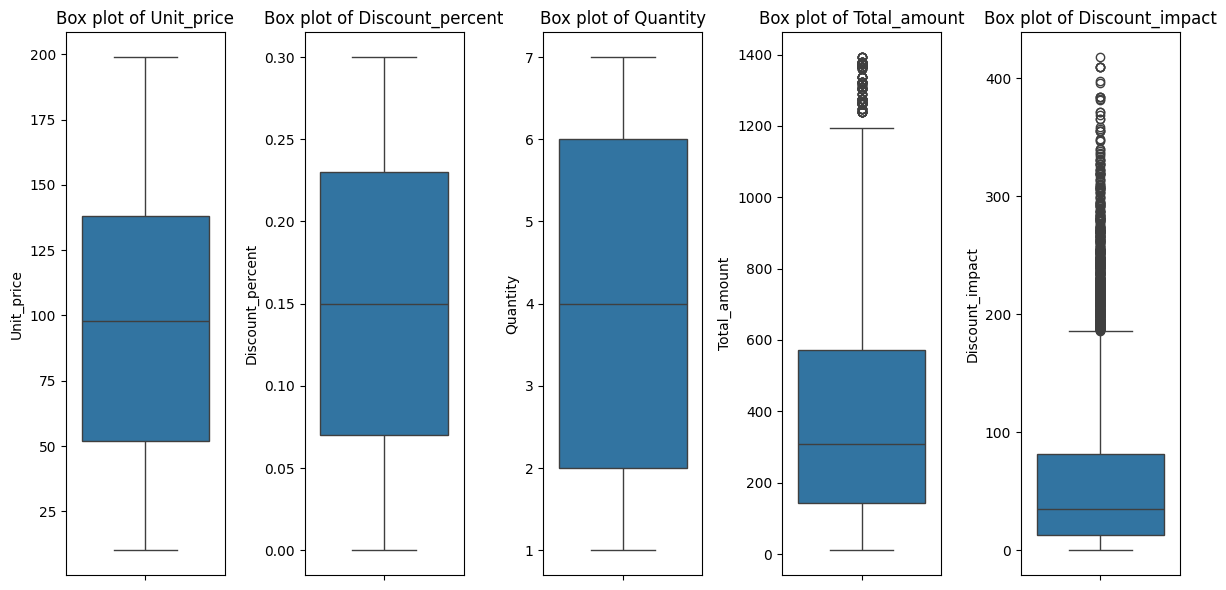

In [15]:
#Outlier Detection with boxplot

import matplotlib.pyplot as plt
import seaborn as sns

#Columns to check
columns = ['Unit_price','Discount_percent','Quantity','Total_amount','Discount_impact']

#Creating subplots
plt.figure(figsize=(12,6))
for i,col in enumerate(columns,1):
    plt.subplot(1,len(columns),i)
    sns.boxplot(y=retail_df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

In [16]:
from scipy import stats
retail_df['Total_amount_zscore'] = stats.zscore(retail_df['Total_amount'])

# Detect outliers for Total amount
total_amount_outliers = retail_df[(retail_df['Total_amount_zscore'] > 3) | (retail_df['Total_amount_zscore'] < -3)]
print("total amount Outliers:", len(total_amount_outliers))

total amount Outliers: 80


In [17]:
retail_df['Discount_impact_zscore'] = stats.zscore(retail_df['Discount_impact'])

# Detect outliers for Discount_impact
discount_impact_outliers = retail_df[(retail_df['Discount_impact_zscore'] > 3) | (retail_df['Discount_impact_zscore'] < -3)]
print("Discount Impact Outliers:", len(discount_impact_outliers))

Discount Impact Outliers: 199


In [18]:
#Log Transformations to Outliers
retail_df['Total_amount'] = np.log1p(retail_df['Total_amount'])
retail_df['Discount_impact'] = np.log1p(retail_df['Discount_impact'])

In [19]:
#Data aggregation to Customer level data
customer_df = retail_df.groupby('Customer_id').agg({
    'Transaction_date': ['min','max','count'],
    'Total_amount': 'sum',
    'Discount_impact': 'sum',
    'Year': 'nunique',
    'Quarter': 'mean',
    'Month': 'mean',
    'Gender': 'first'
}).reset_index()

In [20]:
#Rename columns
customer_df.columns = ['Customer_id','First_purchase_date','Last_purchase_date','Frequency','Monetary','Discount_impact','Years_active','Avg_quater','Avg_month','Gender']

In [21]:
#Feature Extraction
customer_df['Recency'] = (pd.Timestamp.now() - customer_df['Last_purchase_date']).dt.days
customer_df['Customer_tenure'] = (customer_df['Last_purchase_date'] - customer_df['First_purchase_date']).dt.days
customer_df['AOV'] = customer_df['Monetary'] / customer_df['Frequency']

In [22]:
customer_df['Churn_indicator'] = customer_df['Recency'].apply(lambda x:1 if x > 365 else 0)

In [23]:
customer_df['CLV'] = customer_df['AOV'] * customer_df['Frequency'] * customer_df['Customer_tenure']

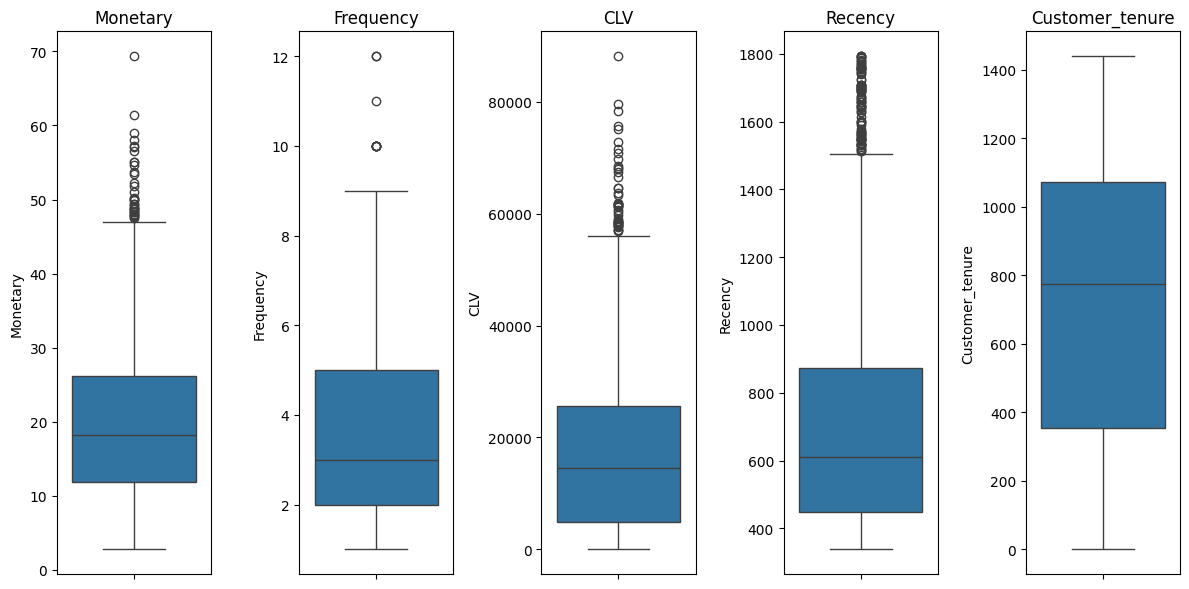

In [24]:
#Outlier detection
columns = ['Monetary','Frequency','CLV','Recency','Customer_tenure']

#Creating subplots
plt.figure(figsize=(12,6))
for i,col in enumerate(columns,1):
    plt.subplot(1,len(columns),i)
    sns.boxplot(y=customer_df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

In [25]:
# Capping extreme values at 95th percentile and 5th percentile
customer_df['Monetary'] = customer_df['Monetary'].clip(upper=customer_df['Monetary'].quantile(0.95))
customer_df['Frequency'] = customer_df['Frequency'].clip(upper=customer_df['Frequency'].quantile(0.95))
customer_df['Recency'] = customer_df['Recency'].clip(upper=customer_df['Recency'].quantile(0.95))
customer_df['CLV'] = customer_df['CLV'].clip(upper=customer_df['CLV'].quantile(0.95))

In [26]:
customer_df.shape

(2823, 15)

In [27]:
retail_df.isna().sum()

Customer_id               0
Age                       0
Gender                    0
City                      0
Country                   0
Product_id                0
Product_category          0
Transaction_id            0
Transaction_date          0
Unit_price                0
Discount_percent          0
Quantity                  0
Rating                    0
Year                      0
Month                     0
Quarter                   0
Weekday                   0
Total_amount              0
Discount_impact           0
Total_amount_zscore       0
Discount_impact_zscore    0
dtype: int64

In [28]:
retail_df.isnull().sum()

Customer_id               0
Age                       0
Gender                    0
City                      0
Country                   0
Product_id                0
Product_category          0
Transaction_id            0
Transaction_date          0
Unit_price                0
Discount_percent          0
Quantity                  0
Rating                    0
Year                      0
Month                     0
Quarter                   0
Weekday                   0
Total_amount              0
Discount_impact           0
Total_amount_zscore       0
Discount_impact_zscore    0
dtype: int64

In [29]:
customer_df = customer_df.drop(['First_purchase_date', 'Last_purchase_date'], axis=1)

In [30]:
#Categorical Encoding
from sklearn.preprocessing import LabelEncoder 
#One-Hot Encoding for Gender and Product Category
customer_df = pd.get_dummies(customer_df,columns = ['Gender'], dtype = int)

In [31]:
#Scaling the RFM features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customer_df[['AOV','Frequency','Recency','Monetary','Discount_impact','Customer_tenure','CLV','Avg_quater','Avg_month']] = scaler.fit_transform(customer_df[['AOV','Frequency','Recency','Monetary','Discount_impact','Customer_tenure','CLV','Avg_quater','Avg_month']])

Customer Segmentation with K means Clustering

In [32]:
customer_ids = customer_df['Customer_id']
customer_df.drop('Customer_id',axis=1,inplace=True)

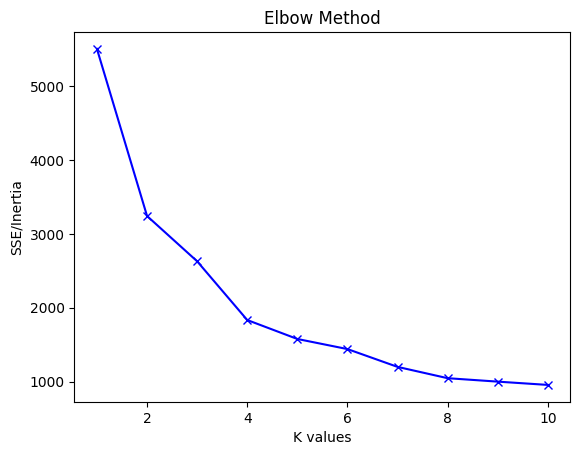

In [33]:
#Finding optimal number of clusters through Elbow method

from sklearn.cluster import KMeans

#Elbow method
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(customer_df)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,'bx-')
plt.xlabel('K values')
plt.ylabel('SSE/Inertia')
plt.title('Elbow Method')
plt.show()

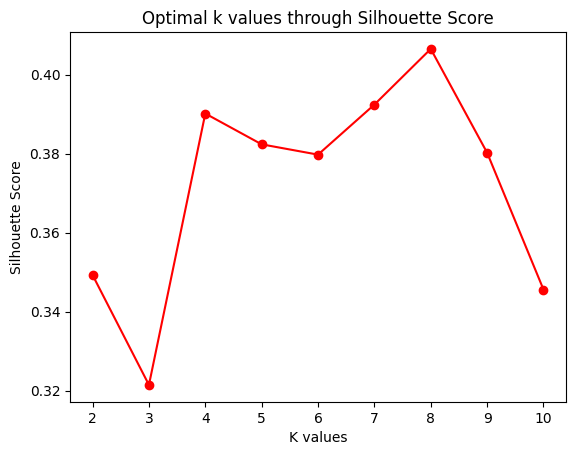

In [ ]:
#Finding optimal number of clusters through Silhouette Score
from sklearn.metrics import silhouette_score

#Silhouette score
silhouette_vals = [] 
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(customer_df)
    score = silhouette_score(customer_df,kmeans.labels_)
    silhouette_vals.append(score)

plt.plot(range(2,11),silhouette_vals,'ro-')
plt.xlabel('K values')
plt.ylabel('Silhouette Score')
plt.title('Optimal k values through Silhouette Score')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=8,random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df)

In [36]:
customer_df['Customer_id'] = customer_ids

In [37]:
segment_analysis = customer_df.groupby('Cluster').mean()
print(segment_analysis)

         Frequency  Monetary  Discount_impact  Years_active  Avg_quater  \
Cluster                                                                   
0         0.574686  0.617518         0.335670      3.000000    0.500704   
1         0.572658  0.619545         0.338200      2.993802    0.498422   
2         0.082329  0.153979         0.107770      1.000000    0.487885   
3         0.331161  0.391659         0.224891      2.000000    0.493173   
4         0.078244  0.154012         0.109634      1.000000    0.491879   
5         0.326717  0.382184         0.218967      2.000000    0.493590   
6         0.788747  0.812227         0.442379      4.000000    0.481938   
7         0.778085  0.795180         0.436707      4.000000    0.520082   

         Avg_month   Recency  Customer_tenure       AOV  Churn_indicator  \
Cluster                                                                    
0         0.500304  0.232345         0.676117  0.645400         0.922170   
1         0.496821  0

In [38]:
final_df = pd.merge(customer_df, retail_df[['Customer_id','Transaction_date', 'Product_category', 'City','Country','Rating','Age','Gender']],on='Customer_id', how='left')

In [39]:
final_df.shape

(10000, 22)

Seasonality analysis

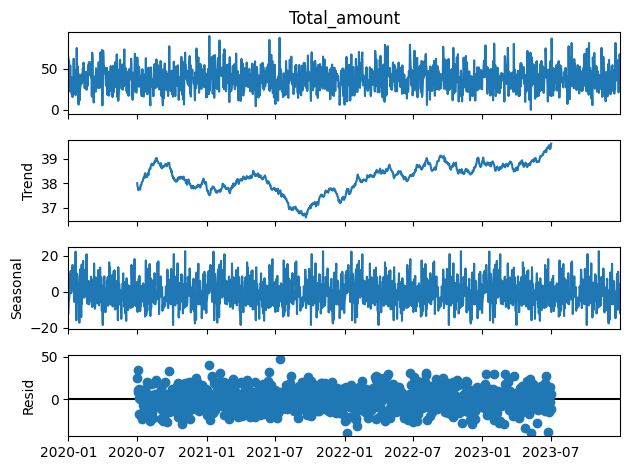

In [40]:
#Seasonality analysis
import statsmodels.api as sm

ss_df = retail_df[['Transaction_date','Total_amount']].copy()
ss_df.set_index('Transaction_date',inplace=True)
daily_sales = ss_df['Total_amount'].resample('D').sum()
decomposition = sm.tsa.seasonal_decompose(daily_sales, model = 'addictive', period=365)
decomposition.plot()
plt.show()

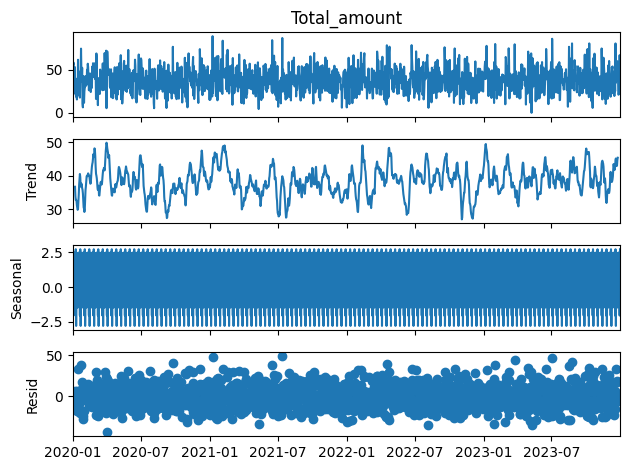

In [41]:
decomposition = sm.tsa.seasonal_decompose(daily_sales, model = 'addictive', period=12)
decomposition.plot()
plt.show()

The seasonality analysis decomposes the daily Total_amount into trend, seasonal, and residual components. With a yearly period (365 days), the trend shows an overall upward trajectory, indicating a steady growth in customer purchases over time. The seasonal component reveals predictable annual patterns, likely influenced by recurring events such as holidays or sales. In contrast, when analyzed with a period of 12, the seasonal component appears less meaningful, suggesting the yearly granularity is more appropriate for identifying patterns in this dataset. The residuals indicate minimal unexplained variation, signifying the data is well-represented by the trend and seasonal components.

Customer Value & Purchase Behavior Analysis

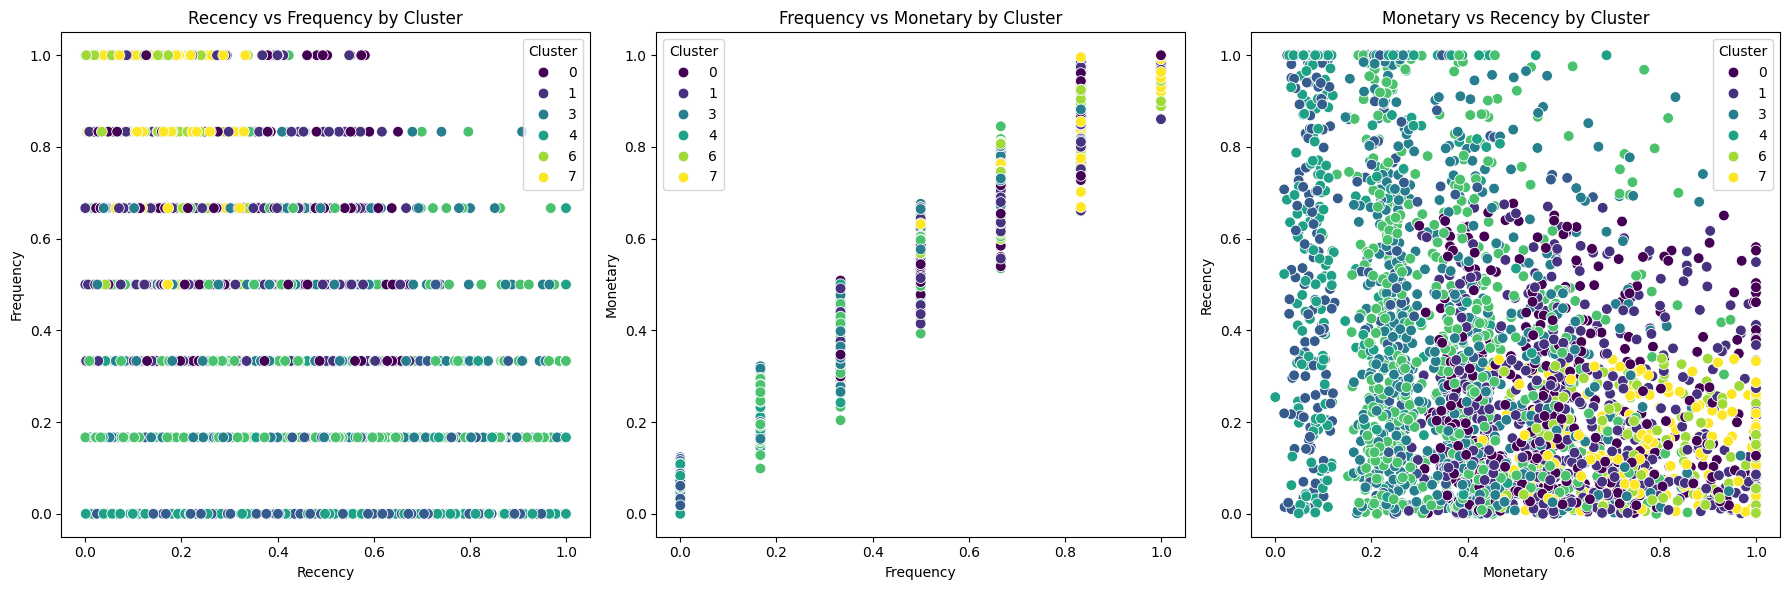

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust the figsize as needed

# Scatter plot for Recency vs Frequency
sns.scatterplot(data=customer_df, x='Recency', y='Frequency', hue='Cluster', palette='viridis', s=60, ax=axes[0])
axes[0].set_title('Recency vs Frequency by Cluster')
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Cluster')

# Scatter plot for Frequency vs Monetary
sns.scatterplot(data=customer_df, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=60, ax=axes[1])
axes[1].set_title('Frequency vs Monetary by Cluster')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Monetary')
axes[1].legend(title='Cluster')

# Scatter plot for Recency vs Monetary
sns.scatterplot(data=customer_df, x='Monetary', y='Recency', hue='Cluster', palette='viridis', s=60, ax=axes[2])
axes[2].set_title('Monetary vs Recency by Cluster')
axes[2].set_xlabel('Monetary')
axes[2].set_ylabel('Recency')
axes[2].legend(title='Cluster')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The analysis visualizes customer behavior across three key dimensions: Recency, Frequency, and Monetary Value, segmented by clusters. The first graph highlights the relationship between **Recency vs Frequency** for different clusters. Cluster 0 and Cluster 3 represent customers with lower recency and lower frequency, suggesting sporadic and older interactions. In contrast, Clusters 6 and 7 indicate higher recency and frequency, reflecting customers who engage more frequently and recently with the business.
The second graph examines the interaction between **Frequency vs Monetary** Value. Cluster 7 stands out with higher frequency and monetary contributions, signifying the most valuable and loyal customer group. Cluster 0 shows lower frequency and monetary value, suggesting low-value or inactive customers. Other clusters, such as 3 and 4, show moderate frequency and spending patterns, indicating customers with some engagement but less consistency.
Lastly, the third graph captures the relationship between **Monetary Value vs Recency**. Cluster 7 again displays higher monetary contributions and recent interactions, confirming its significance as a key group for targeted retention strategies. Conversely, Cluster 1, with low recency and monetary values, may represent lapsed customers requiring re-engagement.
Overall, the clusters provide actionable insights into customer segmentation, enabling the identification of high-value customers (Cluster 7) for rewards programs and low-engagement customers (Cluster 0) for reactivation efforts. These findings can drive more tailored marketing and operational strategies to maximize customer lifetime value.

Demographic Analysis 

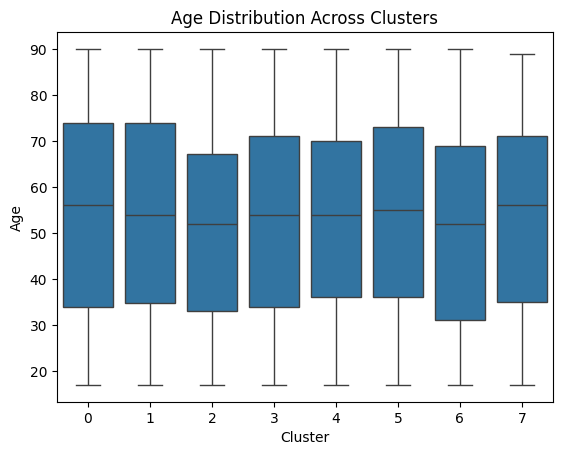

In [43]:
sns.boxplot(x='Cluster', y='Age', data=final_df)
plt.title('Age Distribution Across Clusters')
plt.show()

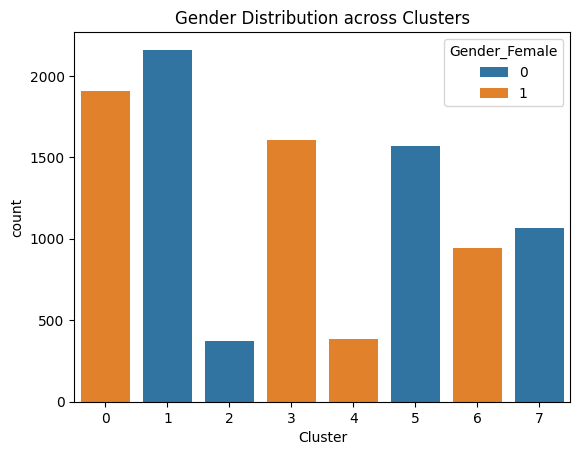

In [44]:
sns.countplot(data=final_df,x='Cluster',hue='Gender_Female')
plt.title('Gender Distribution across Clusters')
plt.show()

The demographic analysis reveals that age distribution across clusters is fairly uniform, with a median age around 50-60 and a range spanning 20 to 90 years, suggesting no significant age-based segmentation. However, gender distribution varies notably between clusters. Clusters like 1 and 5 have a higher proportion of male customers, while Clusters 0 and 3 have a higher proportion of female customers. Clusters 2 and 4 have smaller populations, indicating niche or low-engagement groups. These insights highlight consistent age patterns but distinct gender tendencies, offering opportunities for targeted marketing strategies.

Churn Indicator Analysis

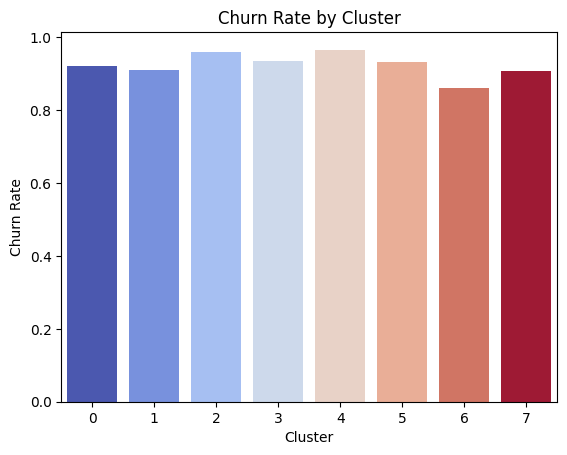

In [45]:
churn_rate = customer_df.groupby('Cluster')['Churn_indicator'].mean().reset_index()
sns.barplot(data=churn_rate, x='Cluster', y='Churn_indicator', palette='coolwarm', hue='Cluster', legend=False)
plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.show()


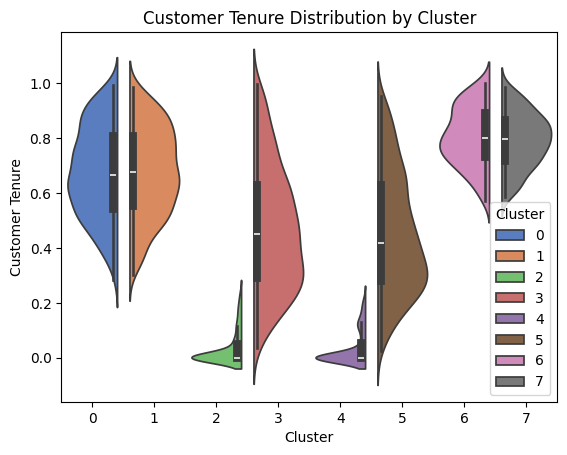

In [46]:
sns.violinplot(data=customer_df, x='Cluster', y='Customer_tenure', palette='muted', split=True, hue = 'Cluster')
plt.title('Customer Tenure Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customer Tenure')
plt.show()


The churn rate analysis reveals that Clusters 3, 4, and 5 have the highest churn rates, indicating a need for focused retention strategies, while Clusters 0 and 6 show lower churn rates, representing more stable customer segments. The customer tenure distribution highlights that Clusters 0 and 1 consist of long-tenure customers, suggesting strong loyalty, whereas Clusters 3 and 4 have shorter tenures, indicating recent acquisitions or weaker retention. These findings emphasize the need for tailored engagement efforts for high-churn and low-tenure clusters to boost customer retention and loyalty.

CLV Analysis

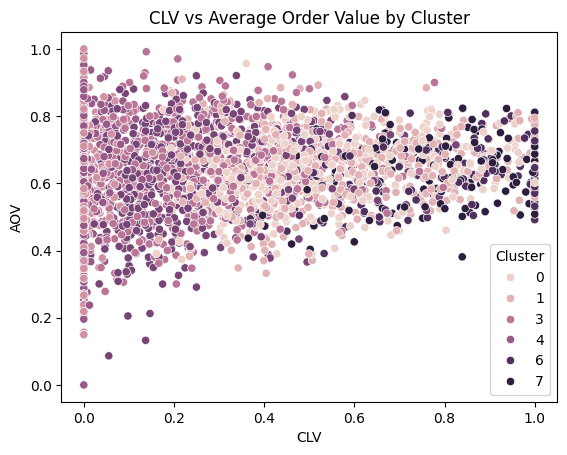

In [47]:
# Scatter plot for CLV vs Average Order Value
sns.scatterplot(x='CLV', y='AOV', hue='Cluster', data=customer_df)
plt.title('CLV vs Average Order Value by Cluster')
plt.show()

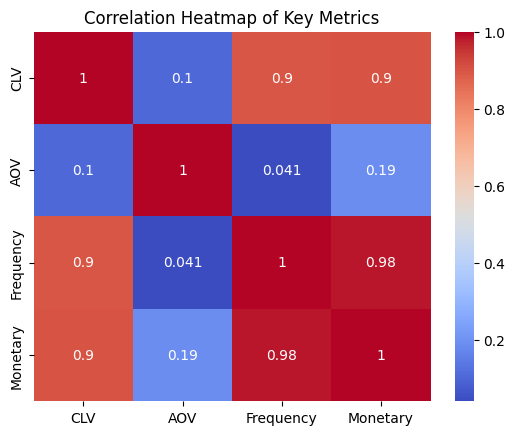

In [48]:
sns.heatmap(customer_df[['CLV', 'AOV', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Metrics')
plt.show()


The CLV (Customer Lifetime Value) Analysis highlights the relationship between Customer Lifetime Value (CLV) and Average Order Value (AOV) across clusters. Clusters 6 and 7 show higher CLV and AOV, representing premium customers, while clusters 3 and 4 indicate lower-value customers and Clusters 0 and 1 are densely populated in the mid-range of CLV and AOV, indicating moderate customer value and purchasing behavior. In addition, CLV showed strong relationships with frequency and monetary values, indicating that repeat transactions and high spending levels drive profitability. These insights can guide targeted marketing strategies to nurture high-value customers and improve engagement with low-value groups.

A/B Testing
Two Sample T-Test
H0: A 10% discount offer doesn't impact purchase frequency 
H1: A 10% discount offer does impact purchase frequency

In [49]:
#Random assignment of Control and Treatment Group
np.random.seed(42)
final_df['Group'] = np.random.choice(['Control','Treatment'], size=len(final_df), p = [0.5,0.5])

In [50]:
final_df['Group'].value_counts()

Group
Control      5076
Treatment    4924
Name: count, dtype: int64

In [51]:
#Stimulate frequency and Monetary values for Treatment Group
#20% increase in Frequency
#15% increase in Monetary

final_df['Stimulated_Frequency'] = np.where(
    final_df['Group'] == 'Treatment', 
    final_df['Frequency'] * 1.2,
    final_df['Frequency']
)

final_df['Stimulated_Monetary'] = np.where(
    final_df['Group'] == 'Treatment', 
    final_df['Monetary'] * 1.15,
    final_df['Monetary']
)

In [52]:
customer_aggregated = final_df.groupby(['Customer_id','Group']).agg({
    'Stimulated_Frequency': 'sum',
    'Stimulated_Monetary': 'sum'
}).reset_index()    

In [53]:
from scipy.stats import ttest_ind

#Create control and treatment groups
control_group = customer_aggregated[customer_aggregated['Group'] == 'Control']
treatment_group = customer_aggregated[customer_aggregated['Group'] == 'Treatment']

#Perform Two T-Test on Frequency and Monetary
t_stat_freq, p_value_freq = ttest_ind(control_group['Stimulated_Frequency'],treatment_group['Stimulated_Frequency'])
t_stat_mon, p_value_mon = ttest_ind(control_group['Stimulated_Monetary'],treatment_group['Stimulated_Monetary'])

#Print Results
print(f"The T-Test for Stimulated Frequency: {t_stat_freq:.3f}, P value: {p_value_freq:.3f}")
print(f"The T-Test for Stimulated Monetary: {t_stat_mon:.3f}, P value: {p_value_mon:.3f}")

The T-Test for Stimulated Frequency: -5.832, P value: 0.000
The T-Test for Stimulated Monetary: -4.801, P value: 0.000


Chi-Square Test
H0: Group and Churn are Independent
H1: Group and Churn are Dependent

In [54]:
from scipy.stats import chi2_contingency

#Create a contingency table
contingency_table = pd.crosstab(final_df['Group'], final_df['Churn_indicator'])

#Perform Chi-Square Test
chi2, p, dof,  expected = chi2_contingency(contingency_table)

#Print Results
print(f"Chi-Square Test: Chi: {chi2:.2f}, P value: {p:.2f}")

Chi-Square Test: Chi: 0.02, P value: 0.88


The T-Test results revealed a statistically significant difference between the control and treatment groups for both Stimulated Frequency and Stimulated Monetary. For Stimulated Frequency, the T-statistic of -5.832 and a P-value of 0.000 confirmed that the 20% simulated increase in frequency for the treatment group was impactful. Similarly, the T-statistic of -4.801 and P-value of 0.000 for Stimulated Monetary demonstrated a significant rise in monetary values due to the 15% simulated increase. However, the Chi-Square test comparing Group (Control vs. Treatment) with Churn Indicator yielded a Chi value of 0.02 and a P-value of 0.88, indicating no significant relationship between group assignment and churn behavior.

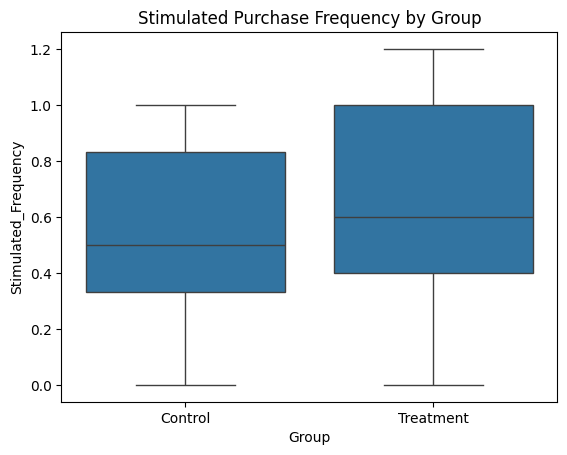

In [55]:
sns.boxplot(x='Group', y='Stimulated_Frequency', data=final_df)
plt.title('Stimulated Purchase Frequency by Group')
plt.show()

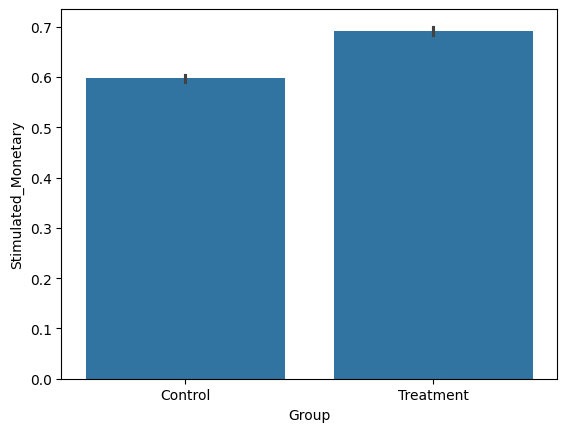

In [56]:
sns.barplot(x='Group',y='Stimulated_Monetary',data=final_df)
plt.show()

The visualizations further support these findings. The boxplot for Stimulated Frequency shows a noticeable increase in the median and spread for the treatment group compared to the control group, highlighting the effectiveness of the simulated treatment. Similarly, the bar chart for Stimulated Monetary depicts a clear rise in the monetary values for the treatment group, reinforcing the T-Test results. These graphs provide a clear, visual representation of the impact of the simulated changes.

In [57]:
final_df.shape

(10000, 25)

In [58]:
final_df.head()

,Frequency,Monetary,Discount_impact,Years_active,Avg_quater,Avg_month,Recency,Customer_tenure,AOV,Churn_indicator,...,Transaction_date,Product_category,City,Country,Rating,Age,Gender,Group,Stimulated_Frequency,Stimulated_Monetary
0,0.333333,0.434863,0.257432,3,0.555556,0.454545,0.060583,0.900694,0.757078,1,...,2020-04-08,Tools,Berlin,Germany,4,58,Female,Control,0.333333,0.434863
1,0.333333,0.434863,0.257432,3,0.555556,0.454545,0.060583,0.900694,0.757078,1,...,2023-10-27,Sports,Berlin,Germany,1,58,Female,Treatment,0.400000,0.500093
2,0.333333,0.434863,0.257432,3,0.555556,0.454545,0.060583,0.900694,0.757078,1,...,2022-04-29,Games,Berlin,Germany,1,58,Female,Treatment,0.400000,0.500093
3,0.000000,0.069958,0.083290,1,0.000000,0.090909,1.000000,0.000000,0.567397,1,...,2020-02-05,Beauty,Los Angeles,United States,4,74,Female,Treatment,0.000000,0.080451
4,1.000000,1.000000,0.670184,4,0.583333,0.590909,0.042874,0.889583,0.677911,1,...,2022-06-11,Garden,Berlin,Germany,1,62,Male,Control,1.000000,1.000000
